<a href="https://colab.research.google.com/github/letsgo247/Deep-Learning-Study/blob/master/Pandas_Archive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import numpy as np
import pandas as pd

#Object Creation

In [203]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [204]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [205]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.754661,-0.191011,0.952014,0.279427
2013-01-02,1.068904,0.806176,0.646467,-0.829324
2013-01-03,0.401184,0.067878,1.097468,0.743143
2013-01-04,-0.296946,0.281542,0.495801,0.075087
2013-01-05,-0.445650,-0.081709,-0.658066,0.906636
2013-01-06,1.392087,-0.609143,-0.387021,-1.197427


In [206]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3]*4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test","train"]),
                    'F': 'foo'})

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [207]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [208]:
df2.G

AttributeError: ignored

#Viewing Data

In [ ]:
df.head(2)

In [ ]:
df.tail(3)

In [ ]:
df.index

In [ ]:
df.columns

In [ ]:
df.to_numpy()

In [ ]:
df2.to_numpy()

In [ ]:
df.describe()

In [ ]:
df.T

In [ ]:
df.sort_index(axis=1, ascending=False)

In [ ]:
df.sort_values(by='B')

In [ ]:
df.sort_values(by='2013-01-05', axis=1)

#Selection

In [ ]:
df['A']

In [ ]:
df['2013-01-02':'20130105']

In [ ]:
df.loc[dates[0]]

In [ ]:
df.loc[:,['A','B']]

In [ ]:
df.loc['20130102':'20130104',['A','B']]

In [ ]:
df.loc['20130102',['A','B']]

In [ ]:
df.loc[dates[0],'A']

In [ ]:
df.at[dates[0],'A']

In [ ]:
df.iloc[3]

In [ ]:
df.iloc[3:5, 0:2]

In [ ]:
df.iloc[[1,2,4], [0,2]]

In [ ]:
df[df['A']>0]

In [ ]:
df[df>0]

In [ ]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

In [ ]:
df2[df2['E'].isin(['two','four'])]

In [ ]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))
s1

In [ ]:
df['F'] = s1
df

In [ ]:
df.at[dates[0],'A']=0

In [ ]:
df.iat[0,1]=0

In [ ]:
df.loc[:,'D']=np.array([5]*len(df))

In [ ]:
df

In [ ]:
df2 = df.copy()
df2[df2>0] = -df2
df2

In [ ]:
df1=df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

In [ ]:
df1.dropna(how='any')

In [ ]:
df1.fillna(value=5)

In [ ]:
pd.isna(df1)

In [ ]:
df

In [ ]:
df.mean(axis=0)

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

In [ ]:
df.sub(s,axis='index')

In [ ]:
df.apply(np.cumsum)

In [ ]:
df.apply(lambda x: x.max()-x.min())

In [ ]:
s = pd.Series(np.random.randint(0,7,size=10))
s

In [ ]:
s.value_counts()

In [210]:
s = pd.Series(['A','B','C','Aaba','Baca',np.nan,'CABA','dog','cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [211]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [212]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.831640,-1.718713,-1.637305,-0.910346
1,-0.229142,0.793533,-1.692165,0.074814
2,0.591261,0.120613,-1.082136,0.621935
3,0.888021,0.163639,0.012413,2.216472
4,1.108202,1.250658,1.079027,-0.627927
5,2.796744,0.140107,0.381763,-0.784712
6,-1.043074,0.436763,0.793915,-0.810335
7,0.105171,0.027415,-0.166265,0.919249
8,1.255469,0.576337,0.997067,0.235580
9,-0.114474,-1.374348,0.840946,2.140948


In [215]:
pieces = [df[:3], df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -0.831640 -1.718713 -1.637305 -0.910346
 1 -0.229142  0.793533 -1.692165  0.074814
 2  0.591261  0.120613 -1.082136  0.621935,
           0         1         2         3
 3  0.888021  0.163639  0.012413  2.216472
 4  1.108202  1.250658  1.079027 -0.627927
 5  2.796744  0.140107  0.381763 -0.784712
 6 -1.043074  0.436763  0.793915 -0.810335,
           0         1         2         3
 7  0.105171  0.027415 -0.166265  0.919249
 8  1.255469  0.576337  0.997067  0.235580
 9 -0.114474 -1.374348  0.840946  2.140948]

In [216]:
pd.concat(pieces)

,0,1,2,3
0,-0.831640,-1.718713,-1.637305,-0.910346
1,-0.229142,0.793533,-1.692165,0.074814
2,0.591261,0.120613,-1.082136,0.621935
3,0.888021,0.163639,0.012413,2.216472
4,1.108202,1.250658,1.079027,-0.627927
5,2.796744,0.140107,0.381763,-0.784712
6,-1.043074,0.436763,0.793915,-0.810335
7,0.105171,0.027415,-0.166265,0.919249
8,1.255469,0.576337,0.997067,0.235580
9,-0.114474,-1.374348,0.840946,2.140948


In [218]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval':[1,2]})
right = pd.DataFrame({'key':['foo','foo'], 'rval': [4,5]})

In [219]:
left

,key,lval
0,foo,1
1,foo,2


In [220]:
right

,key,rval
0,foo,4
1,foo,5


In [222]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [224]:
left = pd.DataFrame({'key': ['foo','bar'], 'lval':[1,2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4,5]})

In [225]:
left

,key,lval
0,foo,1
1,bar,2


In [226]:
right

,key,rval
0,foo,4
1,bar,5


In [227]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [228]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.444718,0.472632
1,bar,one,1.045826,1.592601
2,foo,two,-0.892500,1.144295
3,bar,three,-0.325542,0.161843
4,foo,two,-0.930859,-0.264646
5,bar,two,-1.447447,0.662132
6,foo,one,-0.186848,-0.317304
7,foo,three,-0.124970,0.228045


In [231]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.727164,2.416575
foo,-2.579895,1.263022


In [232]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.045826  1.592601
    three -0.325542  0.161843
    two   -1.447447  0.662132
foo one   -0.631565  0.155327
    three -0.124970  0.228045
    two   -1.823359  0.879650

In [233]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [234]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [237]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A', 'B'])

In [238]:
df2 = df[:4]

In [239]:
df

A         B
first second                    
bar   one    -0.747875  1.294615
      two    -0.576349  0.233339
baz   one    -0.199814  0.347109
      two     0.617456  1.409074
foo   one    -0.245175  1.826777
      two     0.632011 -1.692440
qux   one     0.118358 -0.700821
      two     0.765959 -1.290326

In [240]:
stacked = df2.stack()

In [241]:
stacked

first  second   
bar    one     A   -0.747875
               B    1.294615
       two     A   -0.576349
               B    0.233339
baz    one     A   -0.199814
               B    0.347109
       two     A    0.617456
               B    1.409074
dtype: float64

In [242]:
stacked.unstack()

A         B
first second                    
bar   one    -0.747875  1.294615
      two    -0.576349  0.233339
baz   one    -0.199814  0.347109
      two     0.617456  1.409074

In [243]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.747875 -0.576349
      B  1.294615  0.233339
baz   A -0.199814  0.617456
      B  0.347109  1.409074

In [244]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.747875 -0.199814
       B  1.294615  0.347109
two    A -0.576349  0.617456
       B  0.233339  1.409074

In [247]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] *3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,-0.283298,0.907637
1,one,B,foo,-0.279006,0.906088
2,two,C,foo,-1.641624,-1.014931
3,three,A,bar,-2.240641,0.192328
4,one,B,bar,-1.247449,-0.098623
5,one,C,bar,0.818511,0.572718
6,two,A,foo,-1.107090,0.682111
7,three,B,foo,0.460484,-1.094582
8,one,C,foo,-0.104130,-0.516576
9,one,A,bar,0.337231,-0.993660


In [248]:
pd.pivot_table(df, values='D', index=['A','B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.337231 -0.283298
      B -1.247449 -0.279006
      C  0.818511 -0.104130
three A -2.240641       NaN
      B       NaN  0.460484
      C -1.292691       NaN
two   A       NaN -1.107090
      B  0.492529       NaN
      C       NaN -1.641624

In [249]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    23806
Freq: 5T, dtype: int64

In [251]:
ts

2012-01-01 00:00:00     54
2012-01-01 00:00:01    301
2012-01-01 00:00:02      6
2012-01-01 00:00:03    127
2012-01-01 00:00:04    416
                      ... 
2012-01-01 00:01:35    380
2012-01-01 00:01:36    144
2012-01-01 00:01:37    126
2012-01-01 00:01:38    368
2012-01-01 00:01:39    453
Freq: S, Length: 100, dtype: int64

In [252]:
df = pd.DataFrame({"id": [1,2,3,4,5,6], "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

In [253]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [254]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [255]:
df['grade'].cat.categories = ['very good', 'good', 'very bad']

In [258]:
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [259]:
import matplotlib.pyplot as plt
plt.close('all')

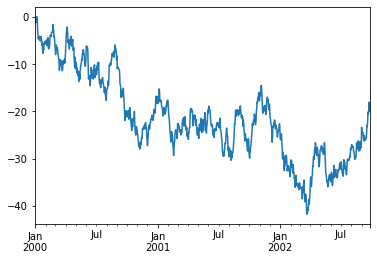

In [268]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

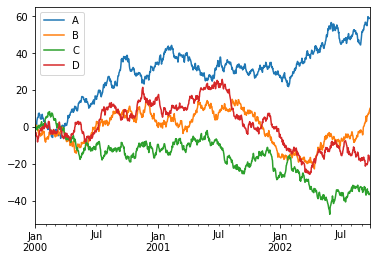

In [278]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

In [279]:
df

,A,B,C,D
2000-01-01,0.212915,0.925445,0.652096,-2.047000
2000-01-02,1.021871,-0.164679,-0.289225,-3.331297
2000-01-03,1.165877,1.041793,-0.933605,-3.077461
2000-01-04,0.909908,-0.429814,-0.651382,-4.931169
2000-01-05,-0.089582,-1.292876,-0.787365,-4.487505
...,...,...,...,...
2002-09-22,58.738799,7.133153,-35.378631,-15.632213
2002-09-23,58.785508,7.372661,-36.607752,-15.601895
2002-09-24,59.027358,8.655555,-36.330861,-16.820574
2002-09-25,58.949601,9.326805,-36.578034,-17.526183


#Getting Data In/Out

In [273]:
df.to_csv('foo.csv')

In [275]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.209524,1.322159,0.056265,1.193744
1,2000-01-02,-0.851500,1.667041,0.154791,-0.434476
2,2000-01-03,-1.319004,2.056539,0.466425,-1.216667
3,2000-01-04,-1.273031,1.438411,0.125360,-1.303175
4,2000-01-05,0.240677,3.199250,0.340353,-2.713404
...,...,...,...,...,...
995,2002-09-22,1.355183,-10.788525,-12.254703,-0.466444
996,2002-09-23,0.723721,-10.272810,-9.908540,-1.651760
997,2002-09-24,0.946638,-11.465501,-9.122333,-2.130670
998,2002-09-25,1.720352,-11.586030,-9.344341,-0.940306


In [276]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [277]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.209524,1.322159,0.056265,1.193744
1,2000-01-02,-0.851500,1.667041,0.154791,-0.434476
2,2000-01-03,-1.319004,2.056539,0.466425,-1.216667
3,2000-01-04,-1.273031,1.438411,0.125360,-1.303175
4,2000-01-05,0.240677,3.199250,0.340353,-2.713404
...,...,...,...,...,...
995,2002-09-22,1.355183,-10.788525,-12.254703,-0.466444
996,2002-09-23,0.723721,-10.272810,-9.908540,-1.651760
997,2002-09-24,0.946638,-11.465501,-9.122333,-2.130670
998,2002-09-25,1.720352,-11.586030,-9.344341,-0.940306
